In [71]:
from utils.data_loader import load_housing_data
from utils.data_partitioner import shuffle_and_split_data, split_data_with_id_hash

# If you run the program again, it will generate a different test set!
# Over time, you (or your machine learning algorithms) will get to see the whole dataset, which is what you want to avoid.
housing = load_housing_data()
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [72]:
# Housing dataset does not have an identifier column. 
# The simplest solution is to use the row index as the ID.
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [73]:
# Generate id based on longitude and latitude
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [74]:
from sklearn.model_selection import train_test_split

# SciKit provides some functions to split the data
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

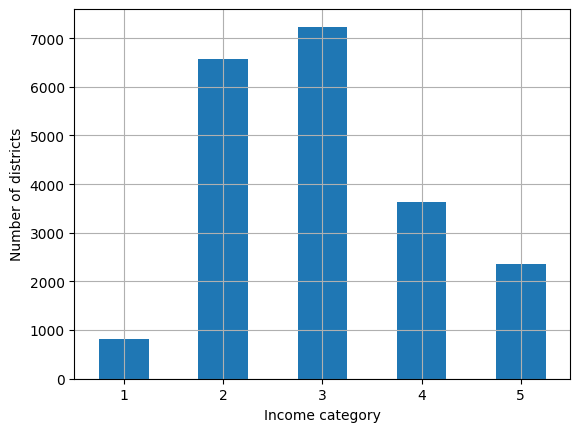

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Divide the data into 5 categories based on income strata
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [76]:
# split() method yields the training and test indices, not the data itself.
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [77]:
#  There’s a shorter way to get a single split using the train_test_split() function with the stratify argument:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [78]:
# You won’t use the income_cat column again, so you might as well drop it, reverting the data back to its original state:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [80]:
# Make a copy of the original so you can revert to it afterwards
housing = strat_train_set.copy()